<a href="https://colab.research.google.com/github/sara010896/PPCA_UnB/blob/main/regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
#Dimensões do DataFrame
print("Dimensões:", df.shape)

Dimensões: (10000, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Primeiras linhas do DataFrame
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Verificando valores faltantes
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
variavel_alvo = 'Exited'

print("\n Distribuição de Churn:")
print(df[variavel_alvo].value_counts(normalize=True))



 Distribuição de Churn:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


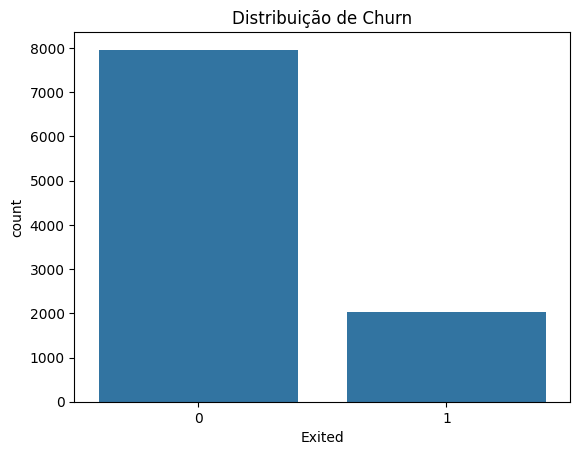

In [ ]:
sns.countplot(x=variavel_alvo, data=df)
plt.title('Distribuição de Churn')
plt.show()

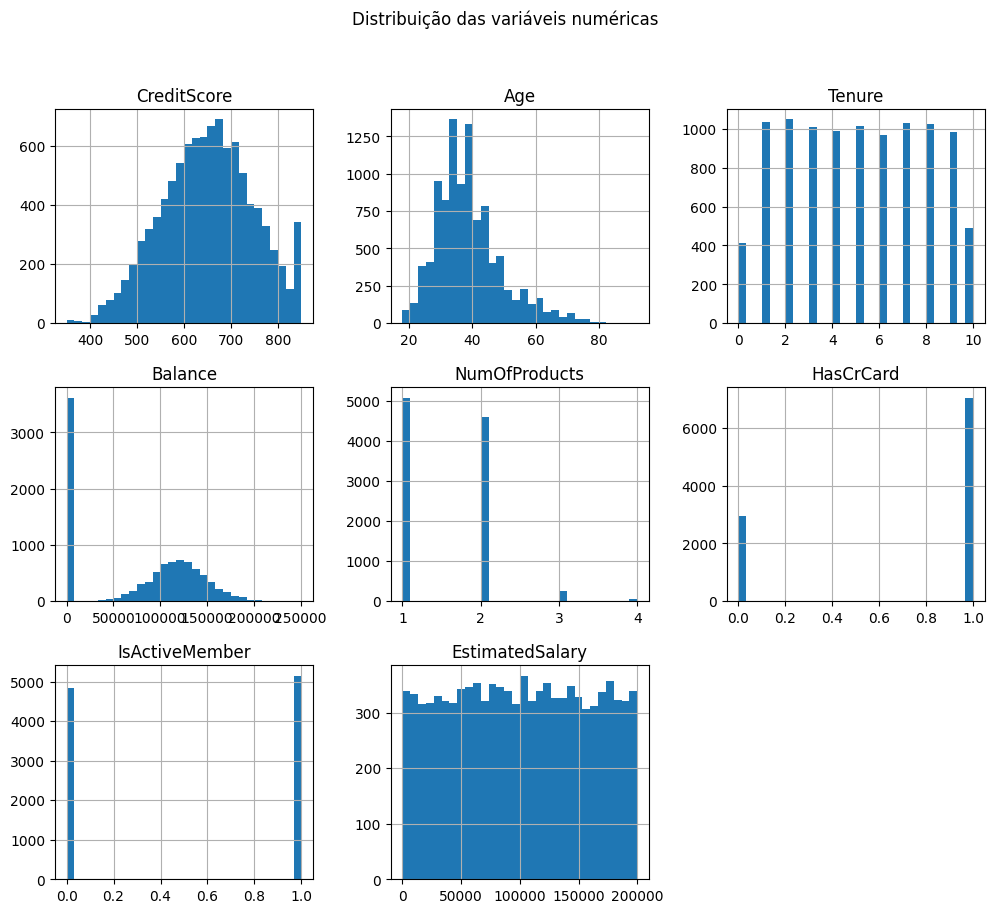

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('RowNumber')
num_cols.remove('CustomerId')
num_cols.remove('Exited')

df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribuição das variáveis numéricas')
plt.show()

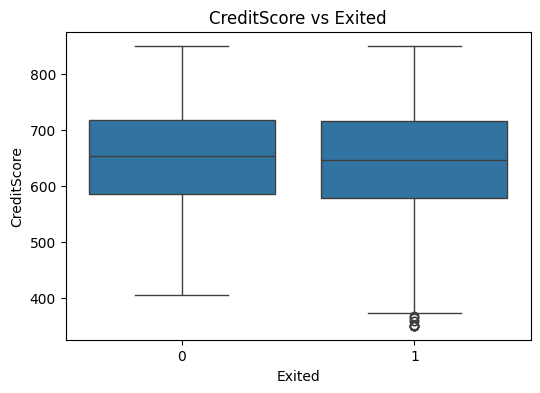

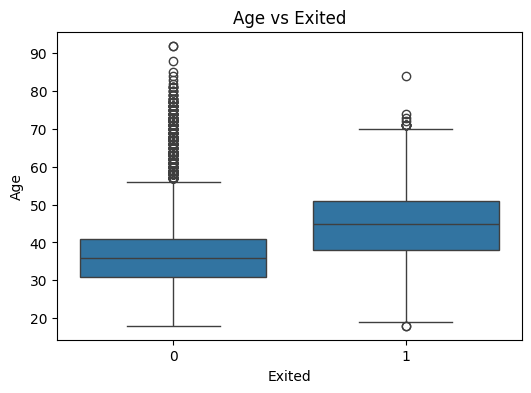

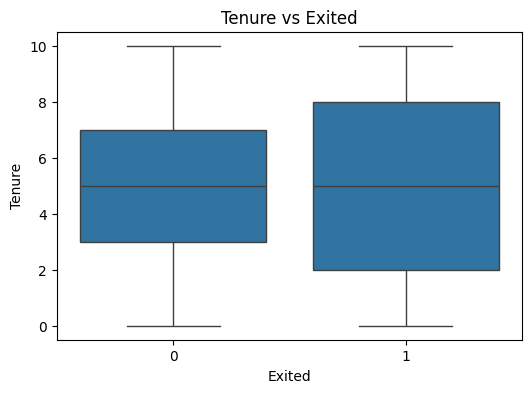

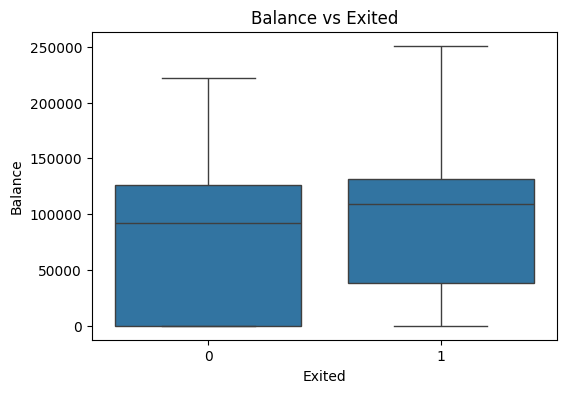

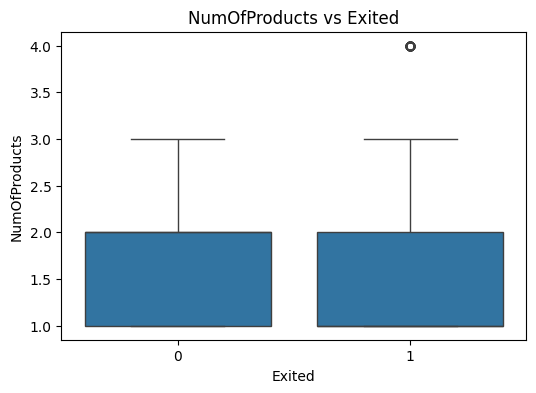

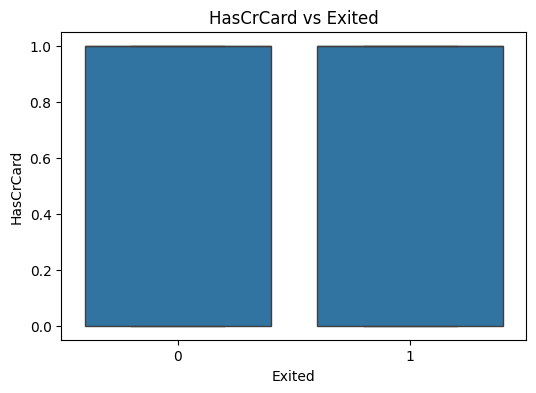

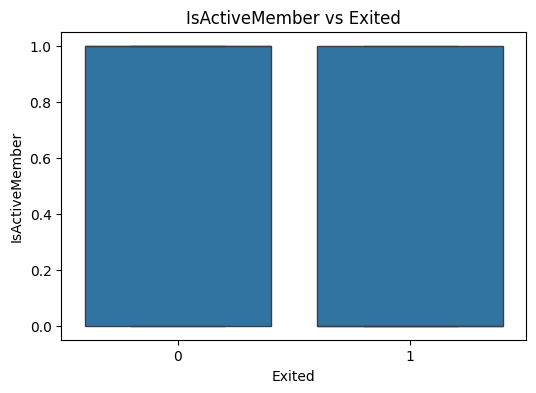

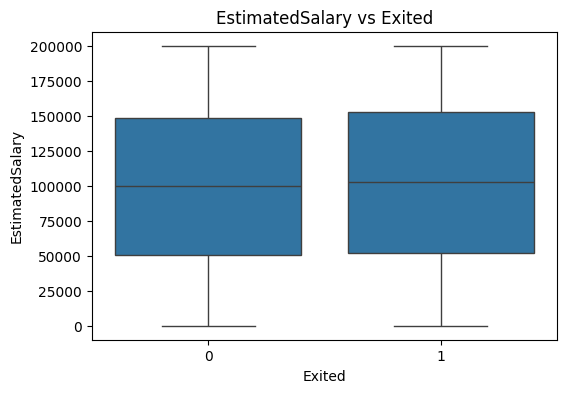

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=variavel_alvo, y=col, data=df)
    plt.title(f'{col} vs {variavel_alvo}')
    plt.show()



Variáveis categóricas: ['Surname', 'Geography', 'Gender']


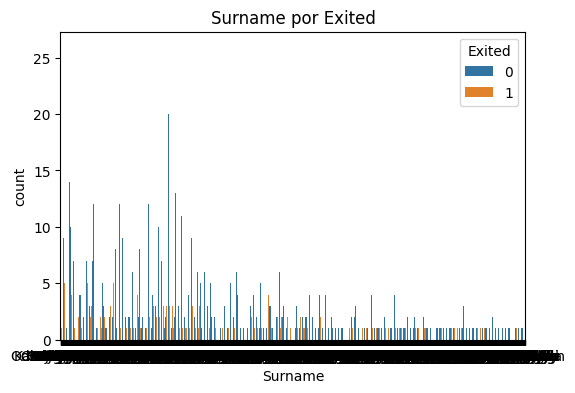

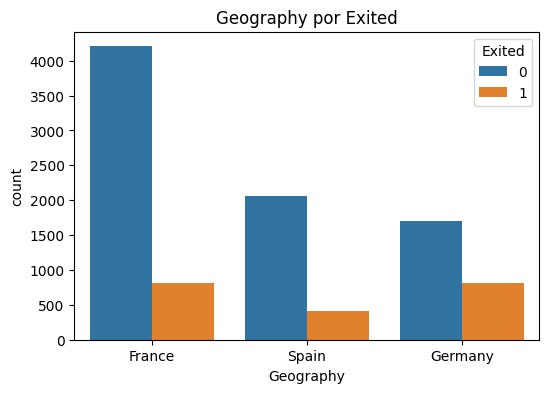

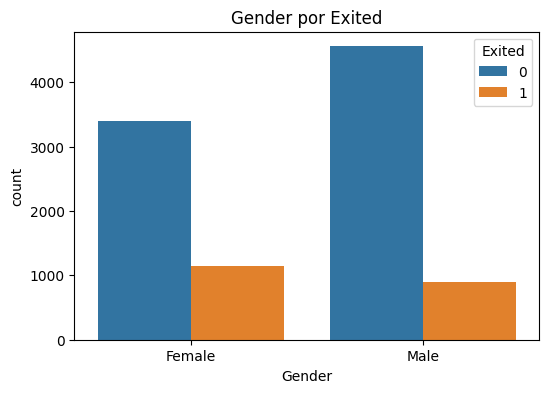

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nVariáveis categóricas:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=variavel_alvo, data=df)
    plt.title(f'{col} por {variavel_alvo}')
    plt.show()

In [ ]:
X_vif = df[num_cols]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nFatores de Inflação da Variância (VIF):")
print(vif_data)



Fatores de Inflação da Variância (VIF):
           Feature        VIF
0      CreditScore  20.542767
1              Age  12.284367
2           Tenure   3.864325
3          Balance   2.624526
4    NumOfProducts   7.702215
5        HasCrCard   3.286163
6   IsActiveMember   2.071745
7  EstimatedSalary   3.885144


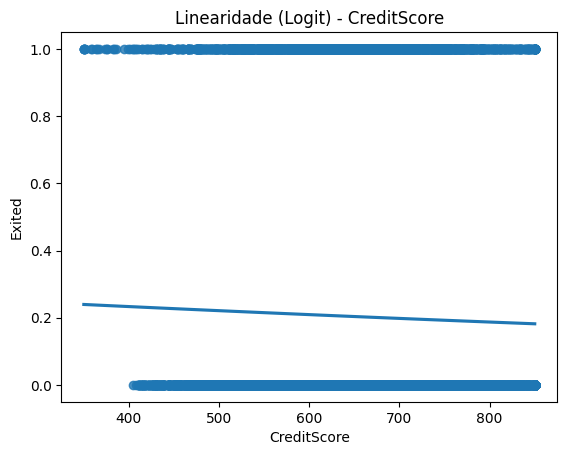

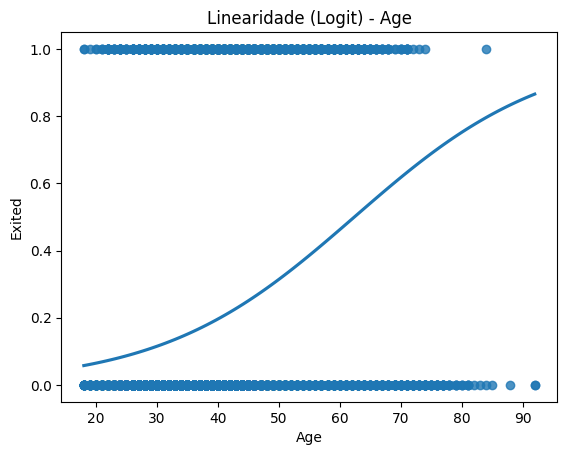

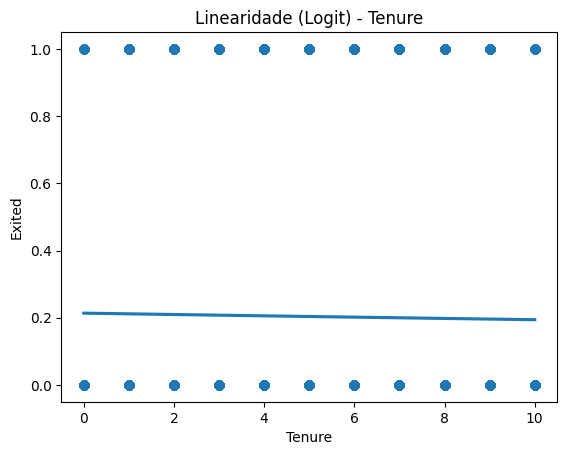

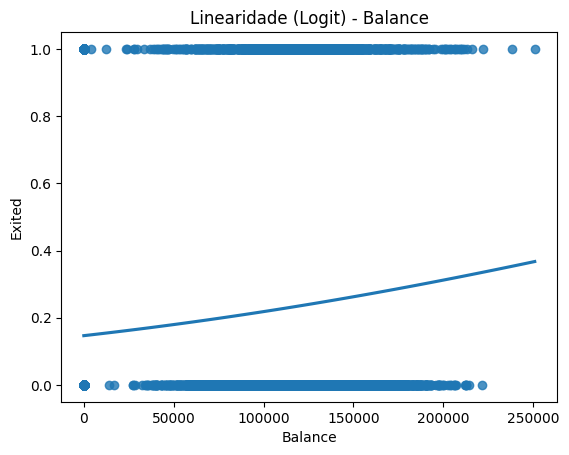

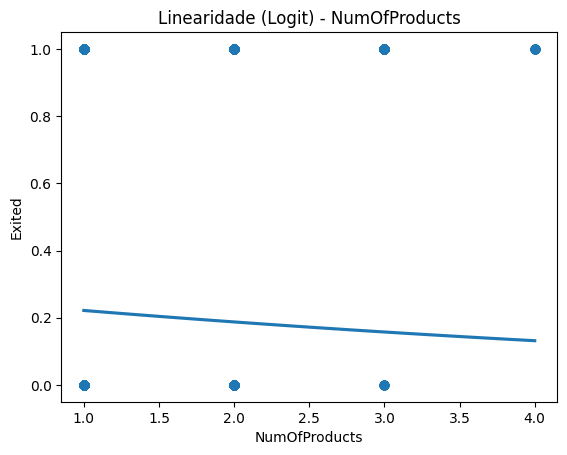

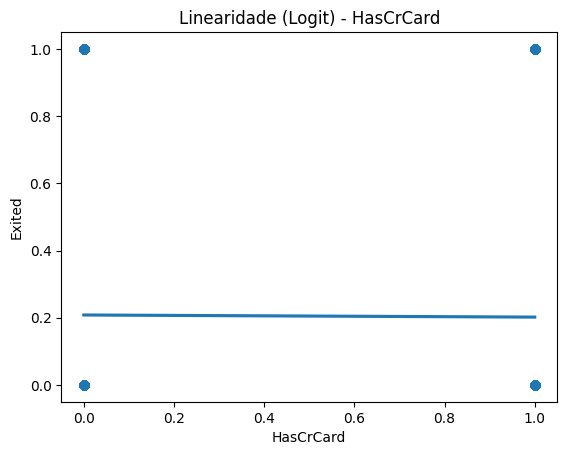

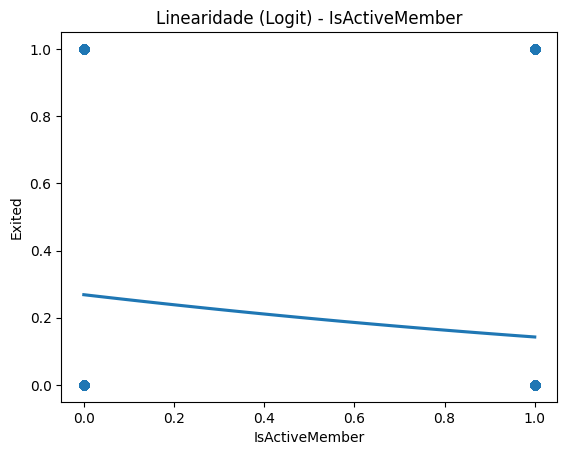

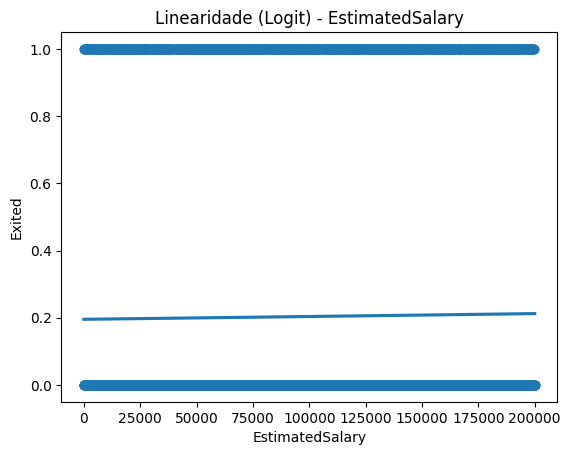

In [ ]:
for col in num_cols:
    sns.regplot(x=df[col], y=df[variavel_alvo], logistic=True, ci=None)
    plt.title(f'Linearidade (Logit) - {col}')
    plt.show()

In [ ]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_encoded, y)

In [ ]:
print("\nDistribuição após SMOTE:")
print(y_res.value_counts())


Distribuição após SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

In [ ]:
model = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
print("\nMétricas de Desempenho:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Sensibilidade (Recall):", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))


Métricas de Desempenho:
Acurácia: 0.6977814985349519
Precisão: 0.6964656964656964
Sensibilidade (Recall): 0.7011301799916283
F1-Score: 0.6987901543596162
AUC-ROC: 0.764020457233788


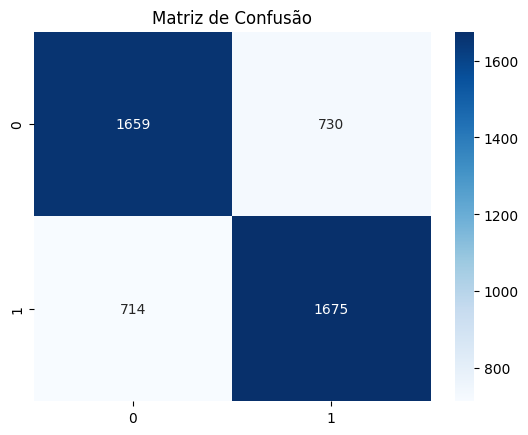

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

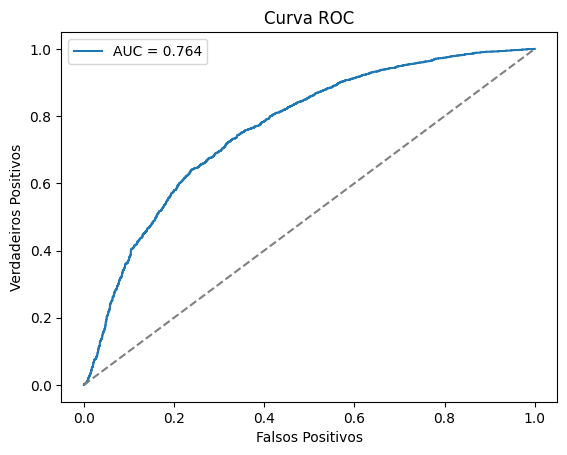

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      2389
           1       0.70      0.70      0.70      2389

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



In [ ]:
X_res_clean = X_res.copy()
for col in X_res_clean.columns:
    X_res_clean[col] = pd.to_numeric(X_res_clean[col], errors='coerce')

In [ ]:
X_res_clean = X_res_clean.dropna(axis=1, how='any')

In [ ]:
print("\nTipos de dados antes do Logit:")
print(X_res_clean.dtypes.value_counts())


Tipos de dados antes do Logit:
int64      6
bool       3
float64    2
Name: count, dtype: int64


In [ ]:
X_res_sm = sm.add_constant(X_res_clean)

In [ ]:
y_res_clean = pd.to_numeric(y_res, errors='coerce')

In [ ]:
logit_model = sm.Logit(y_res_clean, X_res_sm.astype(float)).fit(disp=False)

In [ ]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15926
Model:                          Logit   Df Residuals:                    15914
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                  0.3095
Time:                        05:41:54   Log-Likelihood:                -7622.6
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6484      0.190     -8.692      0.000      -2.020      -1.277
CreditScore          -0.0008      0.000     -3.522      0.000      -0.001      -0.000
Age                   0.

In [ ]:
odds_ratios = np.exp(logit_model.params)
print("\nOdds Ratio (razões de chance):")
print(odds_ratios.sort_values(ascending=False).head(15))


Odds Ratio (razões de chance):
Geography_Germany    5.295655
Geography_Spain      2.062230
Age                  1.090730
Gender_Male          1.064617
EstimatedSalary      1.000000
Balance              0.999999
CreditScore          0.999230
Tenure               0.949304
NumOfProducts        0.528820
HasCrCard            0.521677
const                0.192354
IsActiveMember       0.159335
dtype: float64
